# Bagging

## Imports

In [0]:
import pandas as pd
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

## Progressbar method

In [0]:
def update_progress(progress, length):
    bar_length = 20
    
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)
    
np.set_printoptions(threshold=sys.maxsize)

## Access to gDrive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Wine red quality

### Read the dataset with split 70:30

In [4]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_3/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (1119, 11) | y_train (1119,) | X_test (480, 11) | y_test (480,)


### Case SVM as one-vs-one multiclass strategy


#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap


In [5]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    bagging_clf = BaggingClassifier(SVC(), n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    bagging_clf.fit(X_train, y_train)

    train_acc = bagging_clf.oob_score_

    y_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


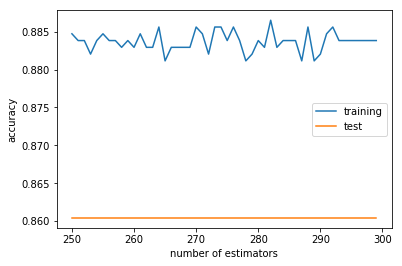

In [6]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
# plt.title('Dokładność modelu w zależności od liczby estymatorów przy podziale danych 70:30')
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_03_estimators_svc.png')
plt.show()

#### Details of the used clasificator

In [7]:
print(f'ensemble model: {bagging_clf} | base estimator: {bagging_clf.base_estimator}')

ensemble model: BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=299, n_jobs=-1, oob_score=True,
                  random_state=None, verbose=0, warm_start=False) | base estimator: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


### Case kNN

In [8]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    bagging_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    bagging_clf.fit(X_train, y_train)

    train_acc = bagging_clf.oob_score_

    y_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


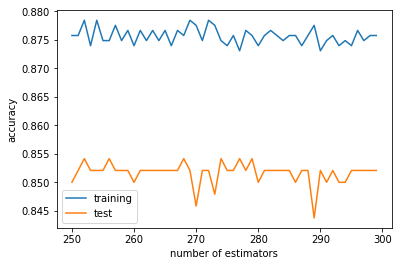

In [9]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
# plt.title('Dokładność modelu w zależności od liczby estymatorów przy podziale danych 70:30')
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_03_estimators_knn.png')
plt.show()

#### Details of the used classificator

In [10]:
bagging_clf

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=299, n_jobs=-1, oob_score=True,
                  random_state=None, verbose=0, warm_start=False)

### Read the dataset with split 80:20

In [11]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_2/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (1119, 11) | y_train (1119,) | X_test (480, 11) | y_test (480,)


### Case SVM as one-vs-one multiclass strategy


#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap

In [12]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    bagging_clf = BaggingClassifier(SVC(), n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    bagging_clf.fit(X_train, y_train)

    train_acc = bagging_clf.oob_score_

    y_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


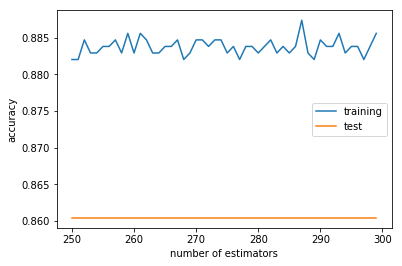

In [13]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_02_estimators_svc.png')
plt.show()

### Case kNN

In [14]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    bagging_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    bagging_clf.fit(X_train, y_train)

    train_acc = bagging_clf.oob_score_

    y_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


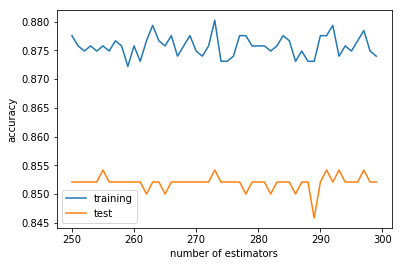

In [15]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_02_estimators_knn.png')
plt.show()

### Read the dataset with split 60:40

In [16]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_4/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (959, 11) | y_train (959,) | X_test (640, 11) | y_test (640,)


### Case SVM as one-vs-one multiclass strategy


#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap

In [17]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    bagging_clf = BaggingClassifier(SVC(), n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    bagging_clf.fit(X_train, y_train)

    train_acc = bagging_clf.oob_score_

    y_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


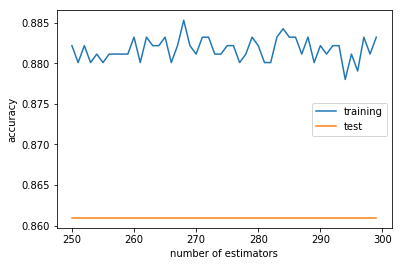

In [18]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_04_estimators_svc.png')
plt.show()

### Case kNN

In [19]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    bagging_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    bagging_clf.fit(X_train, y_train)

    train_acc = bagging_clf.oob_score_

    y_pred = bagging_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


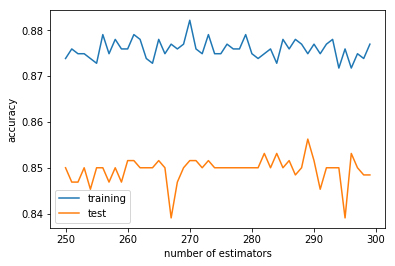

In [20]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_04_estimators_knn.png')
plt.show()